In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from collections import OrderedDict
from scipy.special import expit
import unittest

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

def run_tests():
  unittest.main(argv=[''], verbosity=1, exit=False)

# Datos

In [49]:
data = OrderedDict(
        x =  [50,  10, 20, 5,  95,  70,  100,  200, 0],
        y = [0,   1,  1,  1,  0,   0,   0,    0,   1]
    )

In [70]:
df = pd.DataFrame.from_dict(data)
df

,x,y
0,50,0
1,10,1
2,20,1
3,5,1
4,95,0
5,70,0
6,100,0
7,200,0
8,0,1


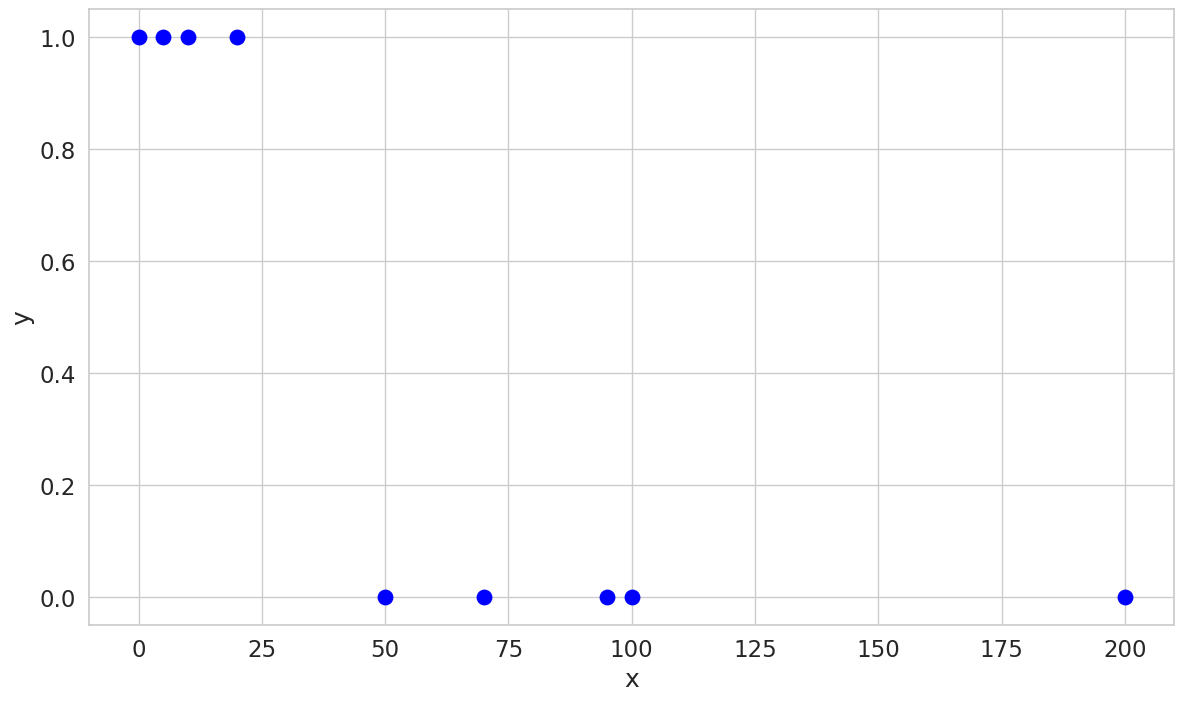

In [63]:
df.plot.scatter(x='x', y='y', s=108, c="blue");

# Tomar decisiones con regresión logística

La regresión logística se utiliza para problemas de clasificación cuando la variable dependiente/objetivo es binaria. Es decir, sus valores son verdaderos o falsos. La regresión logística es uno de los algoritmos más populares y utilizados en la práctica.

Algunos ejemplos de problemas que se pueden resolver con regresión logística son:

- Correo electrónico: decidir si es spam o no
- Transacciones en línea - fraudulentas o no
- Tumor - maligno o benigno
- Actualización del cliente: ¿comprará el cliente la actualización premium o no?

Queremos predecir el resultado de una variable $y^{(l)}$, tal que:

$$y^{(l)} \in \{0, 1\}$$

y establezca $0$: clase negativa (por ejemplo, el correo electrónico no es spam) o $1$: clase positiva (por ejemplo, el correo electrónico es spam).

## ¿No podemos simplemente usar la regresión lineal?

La variable objetivo de respuesta $y^{(l)} $ del modelo de regresión lineal no está restringida dentro del intervalo $[0, 1]$.

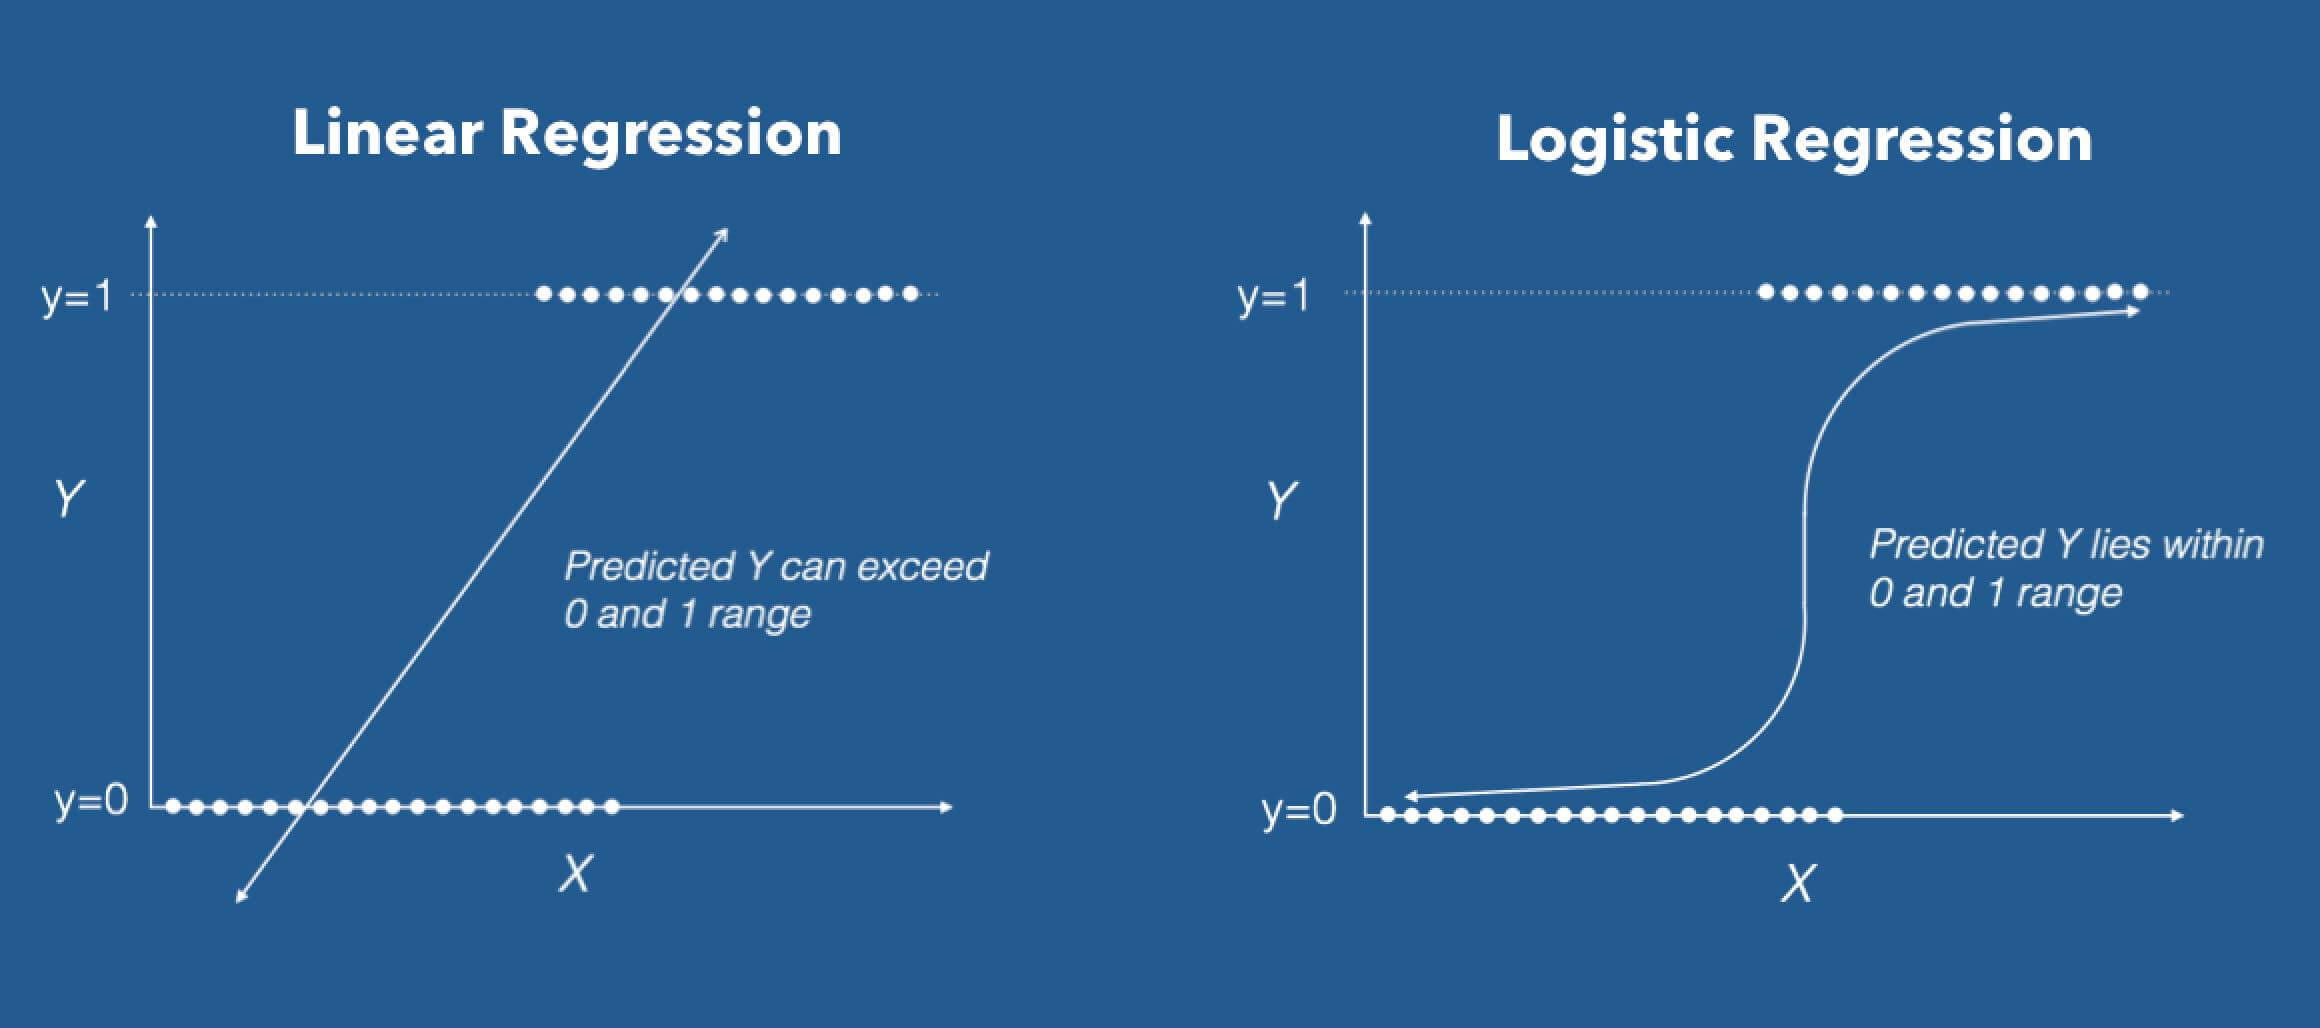

# Modelo de regresión logística

Dado nuestro problema, queremos un modelo que utilice 1 variable (predictor) ($x_1$ - monto_gastado) para predecir si debemos enviar o no un descuento al cliente.

$$f(x,w) = w_0 + w_1x_1$$

donde los coeficientes $w_i$ son parámetros del modelo. Sea el vector coeficiente ${\bf w}$:

$$
    {\bf w} =
     \begin{pmatrix}
     w_0 \\
     w_1 \\
     \end{pmatrix}
$$

Entonces podemos representar $f(x,{\bf w})$ en forma más compacta:

$$f(x,{\bf w}) = {\bf w}^Tx_e$$

Ese es el *modelo de regresión lineal*.

Queremos construir un modelo que genere valores que estén entre $0$ y $1$, por lo que queremos generar una hipótesis que satisfaga $0 \leq f(x,{\bf w}) \leq 1$. Para *Regresión logística* queremos modificar esto e introducir otra función $g$:

$$f(x,{\bf w}) = g({\bf w}^{\top}x_e)$$

Vamos a definir $g$ como:

$$g(z) = \frac{1}{1 + e ^{-z}}$$

donde $z \in \mathbb{R}$. $g$ también se conoce como **función sigmoidea** o **función logística**. Entonces, después de la sustitución, terminamos con esta definición:

$$f(x,{\bf w}) = \frac{1}{1 + e ^{-({\bf w}^{\top}x_e)}}$$

para nuestra hipótesis.

# Una mirada más cercana a la función sigmoidea

Recuerde que la función sigmoidea se define como:

$$g(z) = \frac{1}{1 + e ^{-z}}$$

donde $z \in \mathbb{R}$. Traduzcamos eso a una función de Python:

In [77]:
def sigmoid(z):
 #  return 1 / (1 + np.exp(-z))
 return expit(z)


In [78]:
class TestSigmoid(unittest.TestCase):

    def test_at_zero(self):
      self.assertAlmostEqual(sigmoid(0), 0.5)

    def test_at_negative(self):
      self.assertAlmostEqual(sigmoid(-100), 0)

    def test_at_positive(self):
      self.assertAlmostEqual(sigmoid(100), 1)

In [79]:
run_tests()

loss: 0.6931471805599453 	
loss: 1.8340219443315522 	
loss: 9.14390652799639 	
loss: 4.992547282288288 	
loss: 0.4515735455534862 	
loss: 3.814311647509601 	
loss: 2.2266061355731352 	
loss: 7.416976995232218 	
loss: 0.8136651885994239 	
loss: 10.642585360434802 	


F.......
FAIL: test_correct_prediction (__main__.TestGradientDescent.test_correct_prediction)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipython-input-2314105340.py", line 10, in test_correct_prediction
    self.assertTrue((y_hat == y).all())
AssertionError: np.False_ is not true

----------------------------------------------------------------------
Ran 8 tests in 0.719s

FAILED (failures=1)


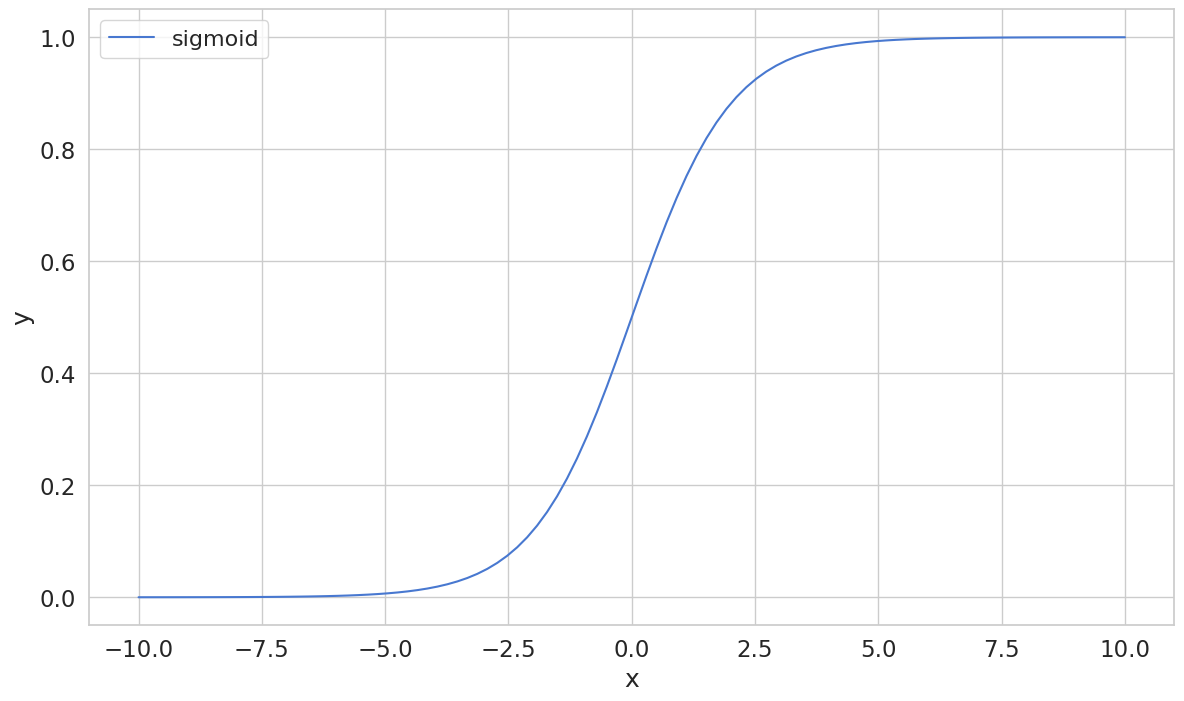

In [80]:
x = np.linspace(-10., 10., num=100)
sig = sigmoid(x)

plt.plot(x, sig, label="sigmoid")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(prop={'size' : 16})
plt.show()

# ¿Cómo podemos encontrar los parámetros de nuestro modelo?

Examinemos algunos enfoques para encontrar buenos parámetros para nuestro modelo. Pero ¿qué significa bueno en este contexto?

## Función de coste

Tenemos un modelo que podemos usar para tomar decisiones, pero aún tenemos que encontrar los parámetros ${\bf w}$. Para hacer eso, necesitamos una medición objetiva de qué tan buenos son algunos conjuntos de parámetros. Para ello, utilizaremos una función de pérdida (costo):

$$J({\bf w}) = \frac{1}{L}\sum^L_{l = 1}\cal{L}(f(x^{(l)},{\bf w}), y^{(l)})$$






La razón de probabilidad es:

$$\text{Log}\left(\frac{p(y=1)}{1-p(y=1)}\right)={\bf w}^{\top}X_e$$

despejamos probabilidad de salida $p(y=1)$

$$e^{{\bf w}^{\top}X_e}=\frac{p(y=1)}{1-p(y=1)}$$

$$e^{{\bf w}^{\top}X_e}-p(y=1)e^{{\bf w}^{\top}X_e}=p(y=1)$$

$$p(y=1)(1+e^{{\bf w}^{\top}X_e})=e^{{\bf w}^{\top}X_e}$$

$$p(y=1)=\frac{e^{{\bf w}^{\top}X_e}}{1+e^{{\bf w}^{\top}X_e}}$$

$$p(y=1)=\frac{1}{1+\frac{1}{e^{{\bf w}^{\top}X_e}}}$$

$$p(y=1)=\frac{1}{1+e^{-{\bf w}^{\top}X_e}}$$

$$
     \cal{L}(f(x,{\bf w}), y) =
     \begin{cases}
     -log(f(x,{\bf w})) &\text{si } y = 1\\
     -log(1 - f(x,{\bf w})) &\text{si } y = 0
     \end{cases}
$$

Que también se conoce como función *Pérdida* o *Pérdida de entropía cruzada*

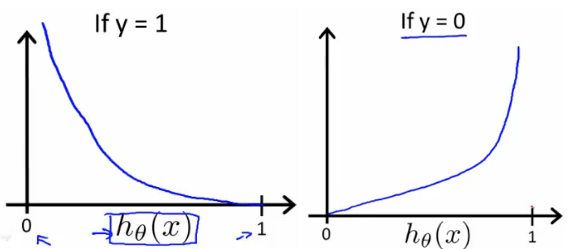

Podemos comprimir la función anterior en una:

$$J(W) = \frac{1}{L}\sum^L_{l = 1}\left(-y^{(l)} \log{(f(x,{\bf w})} - (1 - y^{(l)}) \log{(1 - f(x,{\bf w})})\right)$$

dónde

$$f(x,{\bf w}) = g({\bf w}^{\top}x_e)$$

Implementémoslo en Python:

In [81]:
def loss(h, y):
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [82]:
class TestLoss(unittest.TestCase):

  def test_zero_h_zero_y(self):
    self.assertLess(loss(h=0.000001, y=.000001), 0.0001)

  def test_one_h_zero_y(self):
    self.assertGreater(loss(h=0.9999, y=.000001), 9.0)

  def test_zero_h_one_y(self):
    self.assertGreater(loss(h=0.000001, y=0.9999), 9.0)

  def test_one_h_one_y(self):
    self.assertLess(loss(h=0.999999, y=0.999999), 0.0001)

In [83]:
run_tests()

loss: 0.6931471805599453 	
loss: 1.8340219443315522 	
loss: 9.14390652799639 	
loss: 4.992547282288288 	
loss: 0.4515735455534862 	
loss: 3.814311647509601 	
loss: 2.2266061355731352 	
loss: 7.416976995232218 	
loss: 0.8136651885994239 	


F.......
FAIL: test_correct_prediction (__main__.TestGradientDescent.test_correct_prediction)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipython-input-2314105340.py", line 10, in test_correct_prediction
    self.assertTrue((y_hat == y).all())
AssertionError: np.False_ is not true

----------------------------------------------------------------------
Ran 8 tests in 0.835s

FAILED (failures=1)


loss: 10.642585360434802 	


## Enfoque \#1

Pensemos en 3 números que representan los coeficientes $w_0, w_1, w_2$.

In [84]:
X = df['x'].astype('float').values
y = df['y'].astype('float').values

def predict(x, w):
  return sigmoid(x * w)

def print_result(y_hat, y):
  print(f'loss: {np.round(loss(y_hat, y), 5)} predicted: {y_hat} actual: {y}')



Probamos para la primera muesta de los datos con $w=0.3$

In [85]:
y_hat = predict(x=X[0], w=.3)
print_result(y_hat, y[0])

loss: 15.0 predicted: 0.999999694097773 actual: 0.0


In [86]:
y[0]

np.float64(0.0)

## Enfoque \#2: prueba muchos números

Hoy en día las computadoras son bastante rápidas, hay laptops con más de 6 núcleos en todas partes y los teléfonos también son bastante eficientes. Usemos ese poder para el bien e intentemos encontrar estos parámetros probando muchos números:

In [87]:
for w in np.arange(-1, 1, 0.1):
  y_hat = predict(x=X[0], w=w)
  print(loss(y_hat, y[0]))

0.0
0.0
0.0
6.661338147750941e-16
9.359180097590508e-14
1.3887890837434982e-11
2.0611535832696244e-09
3.059022736706331e-07
4.539889921682063e-05
0.006715348489118056
0.6931471805599397
5.006715348489103
10.000045398900186
15.000000305680194
19.999999966169824
24.99999582410784
30.001020555434774
34.945041100449046
inf
inf


/tmp/ipython-input-427319887.py:2: RuntimeWarning: divide by zero encountered in log
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


## Enfoque \#3 - Descenso de gradiente

Los algoritmos de descenso de gradiente (sí, hay muchos de ellos) nos brindan una manera de encontrar un mínimo de alguna función $f$. Funcionan iterativamente yendo en la dirección del descenso según lo define el gradiente.

En aprendizaje automático, utilizamos algoritmos de descenso de gradiente para encontrar parámetros "buenos" para nuestros modelos (regresión logística, regresión lineal, redes neuronales, etc.).


**Una mirada un poco más profunda sobre cómo funciona el descenso de gradiente (Fuente: PyTorchZeroToAll)**

Comenzando en algún lugar, damos nuestro primer paso cuesta abajo en la dirección especificada por el gradiente negativo. A continuación, recalculamos el gradiente negativo y damos otro paso en la dirección que especifica. Este proceso continúa hasta que llegamos a un punto en el que ya no podemos seguir descendiendo: un mínimo local.

### Primera derivada de la función sigmoidea

La primera derivada de la función sigmoidea se obtiene mediante la siguiente ecuación:

$$g'(z) = g(z)(1 - g(z))$$

Puede encontrar la derivación completa [aquí](https://math.stackexchange.com/a/1225116/499458).

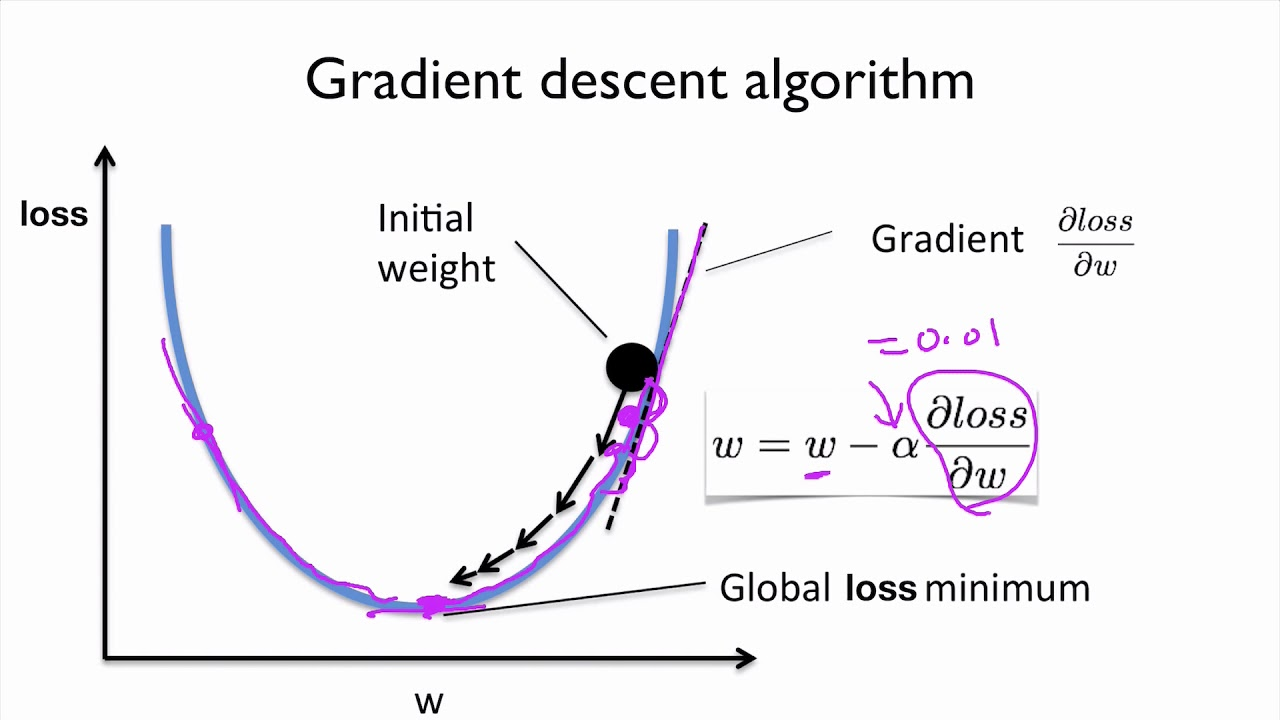

### Primera derivada de la función de coste

Recordemos que la función de coste se dio mediante la siguiente ecuación:

$$J(W) = \frac{1}{L}\sum^L_{l = 1}(-y^{(l)} \log{(f(x,{\bf w}))} - (1 - y^{(l)}) \log{(1 - f(x,{\bf w}))})$$

Nota: $Revisar$

Dado $g'(z) = g(z)(1 - g(z))$

---



Entonces:

$$\frac{\partial{J(f(x,{\bf w}))}}{\partial{f(x,{\bf w})}} =\frac{1}{L}\sum^L_{l = 1}(y(1 - f(x,{\bf w})) - (1 - y)f(x,{\bf w}))x^{(l)} = \frac{1}{L}\sum^L_{l = 1}(y - f(x,{\bf w}))x^{(l)}$$

$$\frac{\partial{J(W)}}{\partial{W}} = \frac{1}{L}\sum^L_{l = 1}\frac{\partial{}}{\partial{W}}(-y^{(l)} \log{(h_w)}) - \frac{1}{L}\sum^L_{l = 1}\frac{\partial{}}{\partial{W}}(1 - y^{(l)}) \log{(1 - h_w)})$$

$$\frac{\partial{J(W)}}{\partial{W}} = -y^{(l)} \frac{1}{L}\sum^L_{l = 1}\frac{\partial{}}{\partial{h_w}} \frac{\partial{h_w}}{\partial{W}}\log{(h_w)} - (1 - y^{(l)}) \frac{1}{L}\sum^L_{l = 1}\frac{\partial{}}{\partial{h_w}} \frac{\partial{h_w}}{\partial{W}} \log{(1 - h_w)}$$

$$\frac{\partial{J(W)}}{\partial{W}} = -y^{(l)} \frac{1}{L}\sum^L_{l = 1}\frac{1}{{h_w}} \frac{\partial{h_w}}{\partial{W}}(h_w) - (1 - y^{(l)}) \frac{1}{L}\sum^L_{l = 1}\frac{1}{1-h_w} \frac{\partial{h_w}}{\partial{W}} (1 - h_w)$$

$$\frac{\partial{J(W)}}{\partial{W}} = -y^{(l)} \frac{1}{L}\sum^L_{l = 1}\frac{1}{{h_w}} h_w(1-h_w)\frac{\partial{w^Tx^{(l)}}}{\partial{W}} - (1 - y^{(l)}) \frac{1}{L}\sum^L_{l = 1}\frac{1}{1-h_w} (0 - h_w(1-h_w))\frac{\partial{w^Tx^{(l)}}}{\partial{W}}$$

$$\frac{\partial{J(W)}}{\partial{W}} = -y^{(l)} \frac{1}{L}\sum^L_{l = 1}\frac{1}{{h_w}} h_w(1-h_w)x^{(l)} - (1 - y^{(l)}) \frac{1}{L}\sum^L_{l = 1}\frac{1}{1-h_w} (0 - h_w(1-h_w))x^{(l)}$$

$$\frac{\partial{J(W)}}{\partial{W}} = -y^{(l)} \frac{1}{L}\sum^L_{l = 1}(1-h_w)x^{(l)} - (1 - y^{(l)}) \frac{1}{L}\sum^L_{l = 1} (- h_w)x^{(l)}$$

$$\frac{\partial{J(W)}}{\partial{W}} = - \frac{1}{L}\sum^L_{l = 1}y^{(l)}x^{(l)}+\frac{1}{L}\sum^L_{l = 1}y^{(l)}h_wx^{(l)} + \frac{1}{L}\sum^L_{l = 1} h_wx^{(l)}  - \frac{1}{L}\sum^L_{l = 1} y^{(l)}h_wx^{(l)}$$

$$\frac{\partial{J(W)}}{\partial{W}} = - \frac{1}{L}\sum^L_{l = 1}y^{(l)}x^{(l)}+ \frac{1}{L}\sum^L_{l = 1} h_wx^{(l)} $$

$$\frac{\partial{J(W)}}{\partial{W}} = - \frac{1}{L}\sum^L_{l = 1}(y^{(l)}-f(x,{\bf w}))x^{(l)}$$

### Actualización de nuestros parámetros ${\bf w}$

La regla de actualización de parámetros que vamos a utilizar está definida por:
$${\bf w} = {\bf w} - \eta (\frac{\partial \cal{L}(\cdot)}{\partial W})$$

$${\bf w} = {\bf w} + \eta (\frac{1}{L}(y - f(x,{\bf w}))x^{(l)})$$

El parámetro $\eta$ se conoce como **tasa de aprendizaje**. Una tasa de aprendizaje alta puede converger rápidamente, pero corre el riesgo de sobrepasar el punto más bajo. Una tasa de aprendizaje baja permite movimientos seguros en la dirección del gradiente negativo. Sin embargo, lleva mucho tiempo, por lo que nos llevará mucho tiempo llegar a la convergencia.



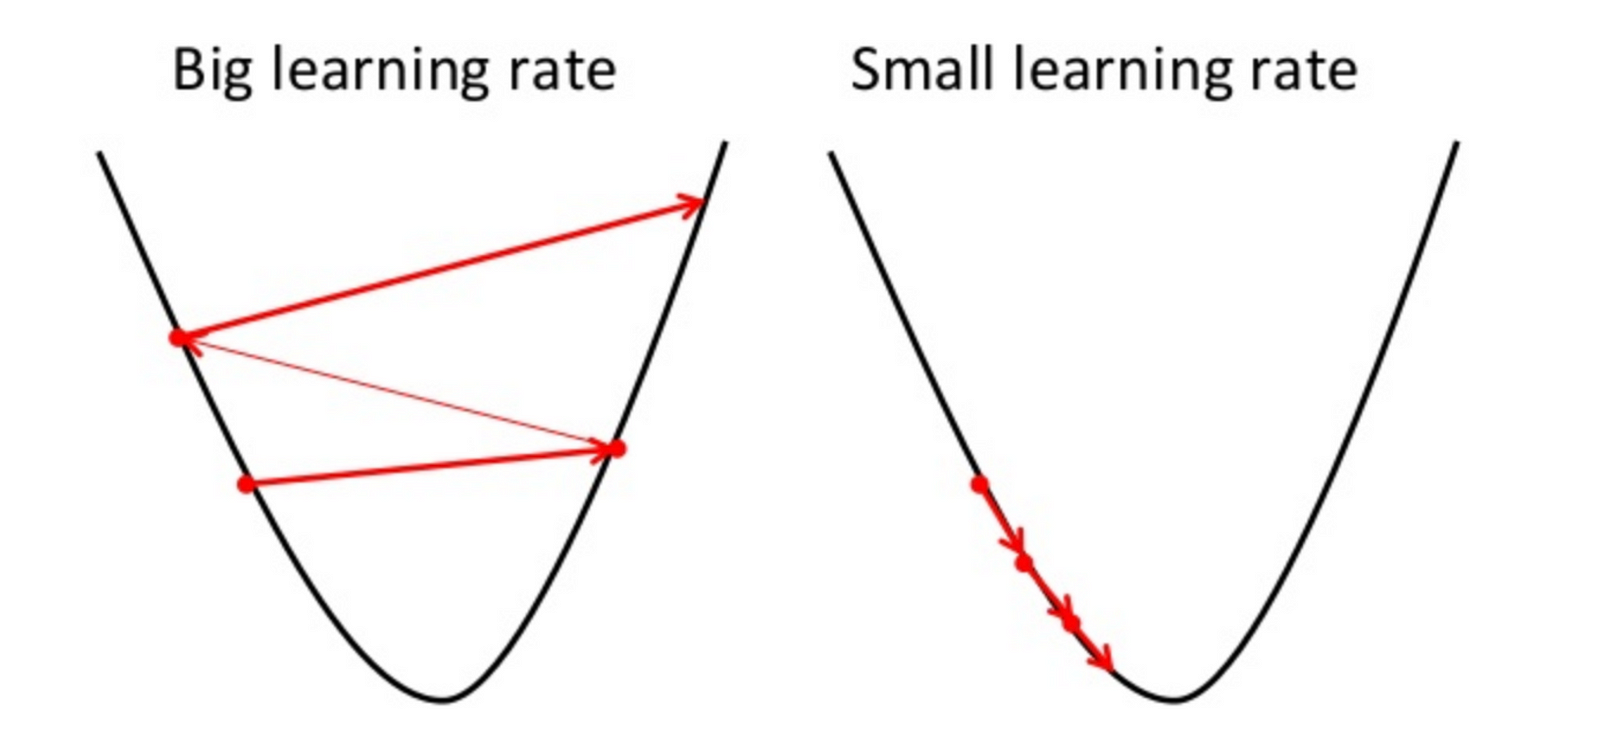

### El algoritmo de descenso de gradiente

```
Repetir hasta la convergencia {
1. Calcular el promedio de gradiente
2. Multiplicar por la tasa de aprendizaje
3. Restar de los pesos
}
```

In [88]:
def predict(X, W):
  return sigmoid(np.dot(X, W))

def fit(X, y, n_iter=100000, lr=0.01):

  W = np.zeros(X.shape[1])

  for i in range(n_iter):
      z = np.dot(X, W)
      h = sigmoid(z)
      gradient = np.dot(X.T, (h - y)) / y.size
      W -= lr * gradient
  return W

In [89]:
class TestGradientDescent(unittest.TestCase):

    def test_correct_prediction(self):
      global X
      global y
      if len(X.shape) != 2:
        X = X.reshape(X.shape[0], 1)
      w, _ = fit(X, y)
      y_hat = predict(X, w).round()
      self.assertTrue((y_hat == y).all())

In [90]:
run_tests()

E.......
ERROR: test_correct_prediction (__main__.TestGradientDescent.test_correct_prediction)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipython-input-2314105340.py", line 8, in test_correct_prediction
    w, _ = fit(X, y)
    ^^^^
ValueError: not enough values to unpack (expected 2, got 1)

----------------------------------------------------------------------
Ran 8 tests in 0.637s

FAILED (errors=1)


Bueno, eso no es bueno, después de todo ese esfuerzo no estamos ni cerca de lograr nuestro objetivo de encontrar buenos parámetros para nuestro modelo. Pero, ¿qué salió mal? Comencemos por determinar si nuestro algoritmo mejora con el tiempo. Podemos usar nuestra métrica de pérdida para eso:

In [91]:
def fit(X, y, n_iter=100000, lr=0.05):

  W = np.zeros(X.shape[1])
  errors = []
  for i in range(n_iter):
      z = np.dot(X, W)
      h = sigmoid(z)
      gradient = np.dot(X.T, (h - y)) / y.size
      W -= lr * gradient

      if(i % 10000 == 0):
        e = loss(h, y)
        print(f'loss: {e} \t')
        errors.append(e)

  return W, errors

In [92]:
run_tests()

loss: 0.6931471805599453 	
loss: 1.8340219443315522 	
loss: 9.14390652799639 	
loss: 4.992547282288288 	
loss: 0.4515735455534862 	
loss: 3.814311647509601 	
loss: 2.2266061355731352 	


F......

loss: 7.416976995232218 	
loss: 0.8136651885994239 	
loss: 10.642585360434802 	


.
FAIL: test_correct_prediction (__main__.TestGradientDescent.test_correct_prediction)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipython-input-2314105340.py", line 10, in test_correct_prediction
    self.assertTrue((y_hat == y).all())
AssertionError: np.False_ is not true

----------------------------------------------------------------------
Ran 8 tests in 0.676s

FAILED (failures=1)


loss: 0.6931471805599453 	
loss: 1.8340219443315522 	
loss: 9.14390652799639 	
loss: 4.992547282288288 	
loss: 0.4515735455534862 	
loss: 3.814311647509601 	
loss: 2.2266061355731352 	
loss: 7.416976995232218 	
loss: 0.8136651885994239 	
loss: 10.642585360434802 	


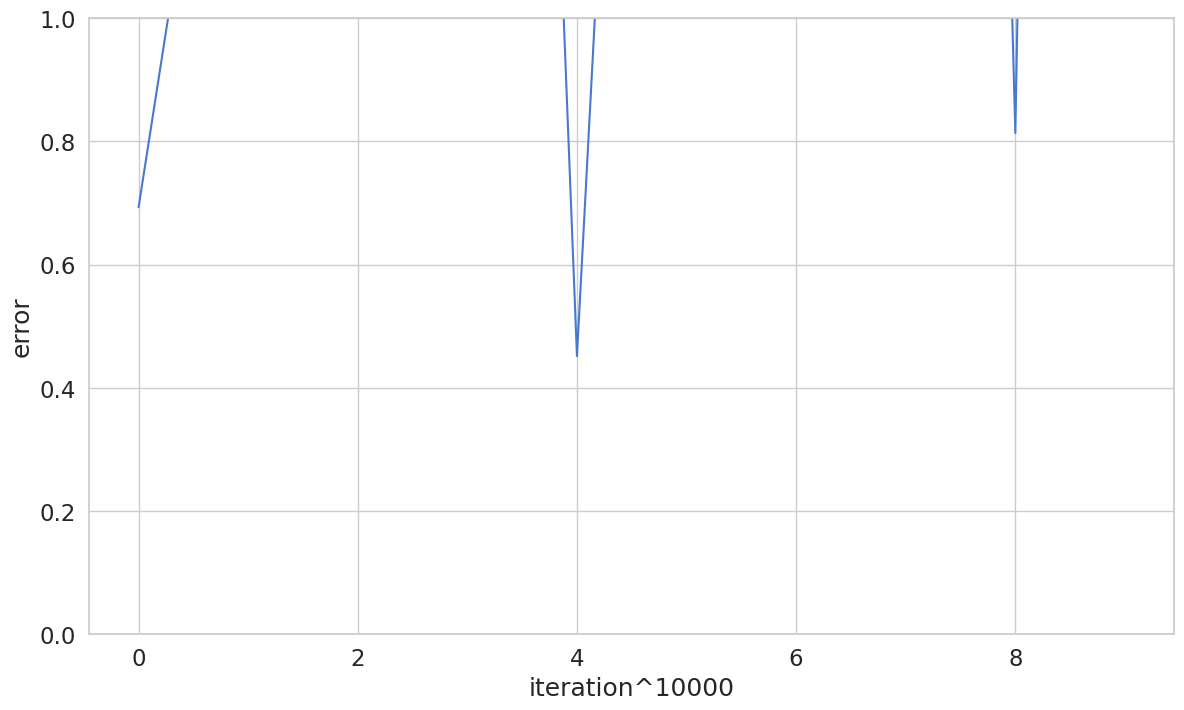

In [93]:
_, errors = fit(X, y)
plt.plot(np.arange(len(errors)), errors)
plt.xlabel("iteration^10000")
plt.ylabel("error")
plt.ylim(0, 1)
plt.show()

Bien, hemos encontrado una posible causa de nuestro problema. Nuestra pérdida no es lo suficientemente baja, en otras palabras, nuestro algoritmo se queda atascado en algún punto que no es un mínimo lo suficientemente bueno para nosotros. ¿Cómo podemos solucionar esto? ¿Quizás, probar con una tasa de aprendizaje diferente o inicializar nuestro parámetro con un valor diferente?

In [94]:
def fit(X, y, n_iter=100000, lr=0.001):

  W = np.zeros(X.shape[1])

  errors = []

  for i in range(n_iter):
      z = np.dot(X, W)
      h = sigmoid(z)
      gradient = np.dot(X.T, (h - y)) / y.size
      W -= lr * gradient

      if(i % 10000 == 0):
        e = loss(h, y)
        print(f'loss: {e} \t')
        errors.append(e)

  return W, errors

In [95]:
run_tests()

loss: 0.6931471805599453 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	


F.......
FAIL: test_correct_prediction (__main__.TestGradientDescent.test_correct_prediction)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipython-input-2314105340.py", line 10, in test_correct_prediction
    self.assertTrue((y_hat == y).all())
AssertionError: np.False_ is not true

----------------------------------------------------------------------
Ran 8 tests in 0.678s

FAILED (failures=1)


loss: 0.41899283818630056 	
loss: 0.41899283818630056 	


¿qué tal si agregamos un parámetro más para que nuestro modelo lo encuentre/aprenda?

In [96]:
def add_intercept(X):
  intercept = np.ones((X.shape[0], 1))
  return np.concatenate((intercept, X), axis=1)

def predict(X, W):
  X = add_intercept(X)
  return sigmoid(np.dot(X, W))

def fit(X, y, n_iter=100000, lr=0.01):

  X = add_intercept(X)
  W = np.zeros(X.shape[1])

  errors = []

  for i in range(n_iter):
      z = np.dot(X, W)
      h = sigmoid(z)
      gradient = np.dot(X.T, (h - y)) / y.size
      W -= lr * gradient

      if(i % 10000 == 0):
        e = loss(h, y)
        errors.append(e)
  return W, errors

In [97]:
run_tests()

........
----------------------------------------------------------------------
Ran 8 tests in 0.571s

OK


In [98]:
fit(X, y, n_iter=100000, lr=0.01)

(array([ 8.95338202, -0.26865935]),
 [np.float64(0.6931471805599453),
  np.float64(0.03318507533080201),
  np.float64(0.018728627089236647),
  np.float64(0.013284106421688719),
  np.float64(0.010366386917886243),
  np.float64(0.008530872620474373),
  np.float64(0.007263308987124896),
  np.float64(0.006332545114210494),
  np.float64(0.0056186288893215995),
  np.float64(0.005052873064950836)])

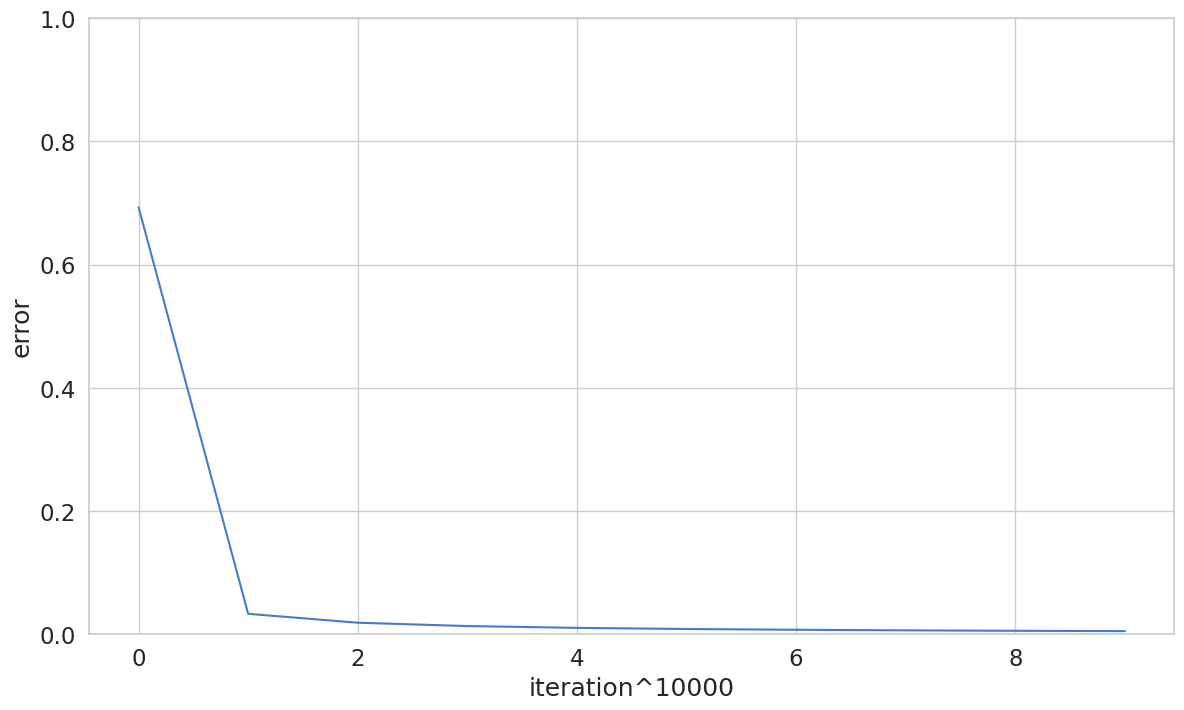

In [99]:
_, errors = fit(X, y)
plt.plot(np.arange(len(errors)), errors)
plt.xlabel("iteration^10000")
plt.ylabel("error")
plt.ylim(0, 1)
plt.show();

### Ocultar la complejidad del algoritmo

Conocer todos los detalles del funcionamiento interno del descenso de gradiente es bueno, pero al resolver problemas en la práctica, es posible que no tengamos mucho tiempo. En esas situaciones, una interfaz simple y fácil de usar para ajustar un modelo de regresión logística podría ahorrarnos mucho tiempo. ¡Así que, construyamos uno!

Pero primero, escribamos algunas pruebas:

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
class TestLogisticRegressor(unittest.TestCase):

    def test_correct_prediction(self):
      global X
      global y
      X = X.reshape(X.shape[0], 1)
      clf = LogisticRegression()
      y_hat = clf.fit(X, y).predict(X)
      self.assertTrue((y_hat == y).all())

In [102]:
run_tests()

.........
----------------------------------------------------------------------
Ran 9 tests in 0.591s

OK


In [103]:
class LogisticRegressor:

  def _add_intercept(self, X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

  def predict_probs(self, X):
    X = self._add_intercept(X)
    return sigmoid(np.dot(X, self.W))

  def predict(self, X):
    return self.predict_probs(X).round()

  def fit(self, X, y, n_iter=100000, lr=0.01):

    X = self._add_intercept(X)
    self.W = np.zeros(X.shape[1])

    for i in range(n_iter):
        z = np.dot(X, self.W)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        self.W -= lr * gradient
    return self

In [104]:
run_tests()

.........
----------------------------------------------------------------------
Ran 9 tests in 0.994s

OK


## Cómo usar nuestro regresor para decidir quién debe recibir códigos de descuento

Ahora que terminaste con la parte "difícil", usemos el modelo para predecir si debemos enviar o no códigos de descuento.

In [105]:
X_test = np.array([10, 250])
X_test = X_test.reshape(X_test.shape[0], 1)
y_test = LogisticRegressor().fit(X, y).predict(X_test)

In [106]:
y_test

array([1., 0.])

In [107]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [108]:
X, y = load_iris(return_X_y=True)

In [109]:
clf = LogisticRegression(max_iter=1000).fit(X, y)

In [110]:
clf.predict(X[:2, :])


array([0, 0])

In [111]:
clf.predict_proba(X[:2, :])

array([[9.81656829e-01, 1.83431562e-02, 1.43950454e-08],
       [9.71510217e-01, 2.84897528e-02, 3.00862540e-08]])

In [112]:
clf.score(X, y)

0.9733333333333334